In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [38]:
import os
path=os.getcwd()
os.listdir(path)

['.git',
 '.ipynb_checkpoints',
 'actions_LEN100000LR0.0000001ER256LOOPS4EPOCHES10Q_LOOPS2',
 'actions_LEN100LR0.00000001ER16LOOPS1EPOCHES1Q_LOOPS1',
 'avg_stats.py',
 'bdpi.py',
 'gym_envs',
 'LEN100000LR0.0000001ER256LOOPS4EPOCHES10Q_LOOPS2-latest.episode',
 'LEN100000LR0.0000001ER256LOOPS4EPOCHES10Q_LOOPS2-LEN100000LR0.0000001ER256LOOPS4EPOCHES10Q_LOOPS2-actor',
 'LEN100000LR0.0000001ER256LOOPS4EPOCHES10Q_LOOPS2-LEN100000LR0.0000001ER256LOOPS4EPOCHES10Q_LOOPS2-critic0',
 'LEN100000LR0.0000001ER256LOOPS4EPOCHES10Q_LOOPS2-LEN100000LR0.0000001ER256LOOPS4EPOCHES10Q_LOOPS2-critic1',
 'LEN100000LR0.0000001ER256LOOPS4EPOCHES10Q_LOOPS2-LEN100000LR0.0000001ER256LOOPS4EPOCHES10Q_LOOPS2-critic2',
 'LEN100000LR0.0000001ER256LOOPS4EPOCHES10Q_LOOPS2-LEN100000LR0.0000001ER256LOOPS4EPOCHES10Q_LOOPS2-critic3',
 'LEN100000LR0.0000001ER256LOOPS4EPOCHES10Q_LOOPS2-LEN100000LR0.0000001ER256LOOPS4EPOCHES10Q_LOOPS2-critic4',
 'LEN100000LR0.0000001ER256LOOPS4EPOCHES10Q_LOOPS2-LEN100000LR0.0000001ER256LOOPS4

In [54]:
run_name='_LEN100000LR0.0000001ER256LOOPS4EPOCHES10Q_LOOPS2'

In [85]:
out = pd.read_csv('out'+run_name, sep=" ", header=None)
out.columns = ['episode','reward', 'seen_reward', 'avg', 'total_timesteps', 'total_seconds', 'length']

qvalues = pd.read_csv('Q_values'+run_name, sep=" ", header=None)
qvalues.columns = ['q_min', 'q_mean', 'q_max']

In [86]:
#f = open('probs'+run_name)
f=open('probs'+run_name)
triplets=f.read().replace('\n', "").replace('    ', " ").replace('   ', " ").replace('  ', " ").split('][')
for i in range(0,len(triplets)): 
    triplets[i]=triplets[i].replace('[', "").replace(']', "").rstrip(' ').split(' ')
f.close()
probs_mat=np.array(triplets, dtype=np.float)

In [87]:
f=open('probs_normalized'+run_name)
triplets=f.read().replace('\n', "").replace('    ', " ").replace('   ', " ").replace('  ', " ").split('][')
for i in range(0,len(triplets)): 
    triplets[i]=triplets[i].replace('[', "").replace(']', "").rstrip(' ').split(' ')
f.close()
probs_n_mat=np.array(triplets, dtype=np.float)

In [88]:
#np.shape(A)
probs=pd.DataFrame(data=probs_mat,    # values
             index=range(np.shape(probs_mat)[0]),    # 1st column as index
             columns=range(1,54))

probs_n=pd.DataFrame(data=probs_n_mat,    # values
             index=range(np.shape(probs_n_mat)[0]),    # 1st column as index
             columns=range(1,54))

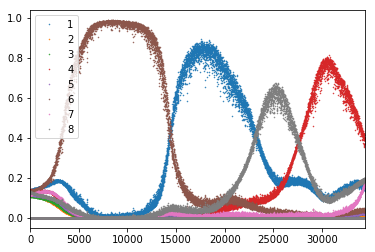

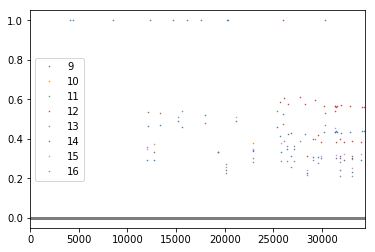

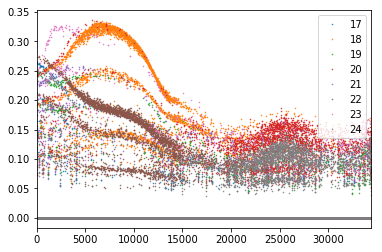

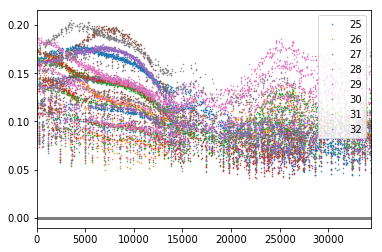

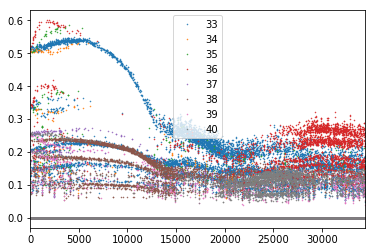

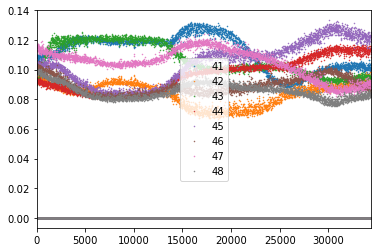

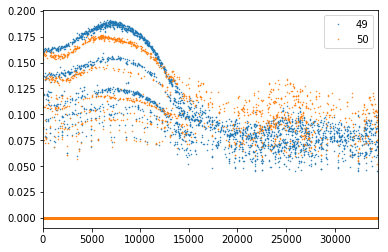

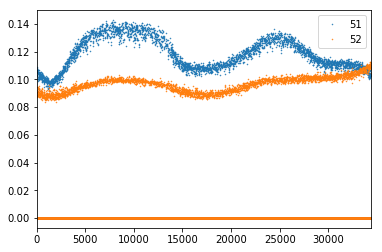

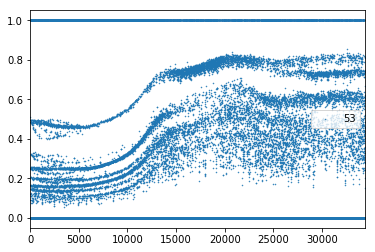

In [89]:
for i in [[1,8],[9,16],[17,24],[25,32],[33,40],[41,48],[49,50],[51,52],[53,53]]:    
    probs_n[list(range(i[0],i[1]+1))].plot(linestyle='None', marker='.',markersize = 1.0)

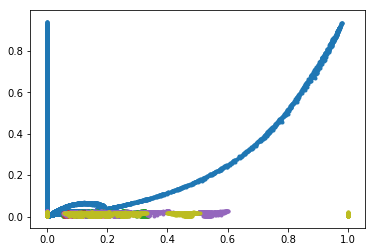

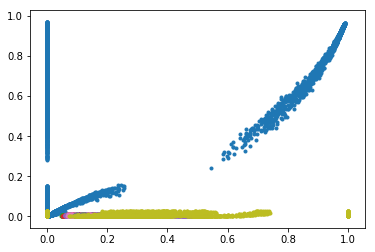

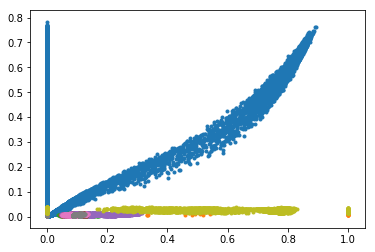

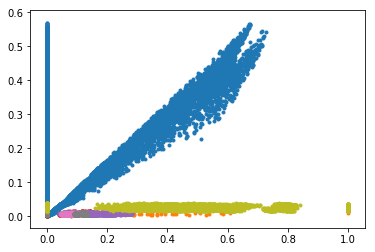

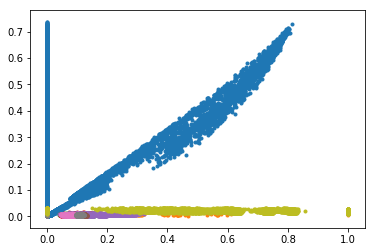

In [90]:
for j in range(5):
    a=int(0.2*j*len(probs_n))
    b=int(0.2*(j+1)*len(probs_n))
    for i in [[1,8],[9,16],[17,24],[25,32],[33,40],[41,48],[49,50],[51,52],[53,53]]: 
            plt.scatter(x=probs_n[list(range(i[0],i[1]+1))][a:b],y=probs[list(range(i[0],i[1]+1))][a:b],linestyle='None', marker='.')
    plt.show()

## probs.plot(linestyle='None', marker='.',markersize = 1.0)

for i in range(len(triplets)):
        if len(triplets[i])!=53:
            print(i,len(triplets[i]),triplets[i])



data[(data.reward>11) ].reward.plot()
data[(data.reward<11) & (data.reward>5)].reward.plot()
data[(data.reward<5) & (data.reward>0)].reward.plot()
data[data.reward<0].reward.plot()

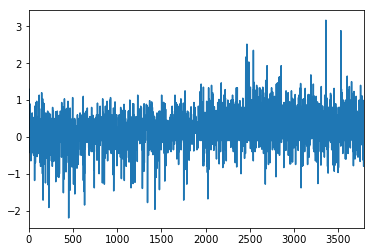

In [91]:
out.reward.plot()

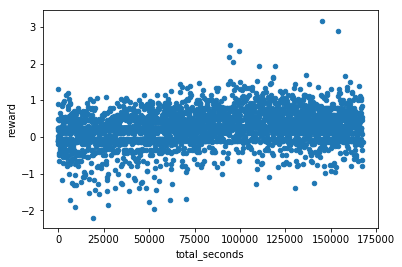

In [92]:
out.plot.scatter(x='total_seconds',y='reward')


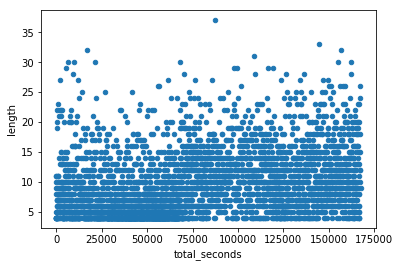

In [93]:
out.plot.scatter(x='total_seconds',y='length')

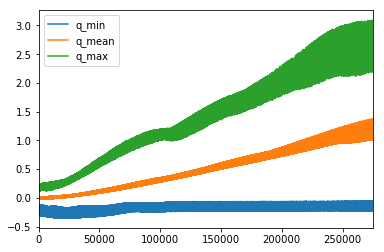

In [94]:
qvalues.plot()